In [1]:
# Study the decision tree algorithm,
# focusing on both entropy based information
# gain and Gini index for splitting. Build
# decision trees and random forests for the loan
# datasets.

In [2]:
# all necessary imports

import pandas as pd
import numpy as np
import seaborn as sns
from sklearn import metrics
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from scipy.stats import linregress
import matplotlib.pyplot as plt
from sklearn import tree



sns.set(style="white")
sns.set(style="whitegrid", color_codes=True)

In [3]:
dataset = pd.read_excel('loan.xlsx')
new_dataset = dataset
dataset.head()

,Sex,Age,Time_at_address,Res_status,Telephone,Occupation,Job_status,Time_employed,Time_bank,Liab_ref,Acc_ref,Home_Expn,Balance,Decision
0,M,50.750000,0.585,owner,given,unemploye,unemploye,0,0,f,given,145,0,reject
1,M,19.670000,10.000,rent,not_given,labourer,governmen,0,0,t,given,140,0,reject
2,F,52.830002,15.000,owner,given,creative_,private_s,5,14,f,given,0,2200,accept
3,M,22.670000,2.540,rent,not_given,creative_,governmen,2,0,f,given,0,0,accept
4,M,29.250000,13.000,owner,given,driver,governmen,0,0,f,given,228,0,reject


In [4]:
# data preprocessing for loan.xlsx file was done
# in the previous assignment. The reference for preprocessing
# has been taken from the previous assignment

# dataset summary
dataset.describe()

,Age,Time_at_address,Time_employed,Time_bank,Home_Expn,Balance
count,429.000000,429.000000,429.000000,429.000000,429.000000,429.000000
mean,31.510163,4.650758,1.871795,2.279720,176.727273,898.382284
std,11.843595,4.804037,3.254023,3.966105,142.590659,3814.565340
min,15.170000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,22.670000,1.000000,0.000000,0.000000,80.000000,0.000000
50%,28.500000,2.750000,1.000000,0.000000,160.000000,10.000000
75%,38.250000,7.000000,2.000000,3.000000,272.000000,484.000000
max,76.750000,25.209999,20.000000,23.000000,760.000000,51100.000000


In [5]:
# finding out null data => missing data
dataset.isnull().sum()

# inference => no missing data

Sex                0
Age                0
Time_at_address    0
Res_status         0
Telephone          0
Occupation         0
Job_status         0
Time_employed      0
Time_bank          0
Liab_ref           0
Acc_ref            0
Home_Expn          0
Balance            0
Decision           0
dtype: int64

In [6]:
dataset.shape

# before calculating correlation, we shall one. hot encode Sex, Res_Status, Telephone, Occupation, Job Status, Acc_ref, Decision

(429, 14)

In [7]:
# one hot encoding
onehot_encoder = OneHotEncoder(handle_unknown='ignore')

# label encoder
label_encoder = LabelEncoder()

In [8]:
# sex
print('Sex: ', dataset['Sex'].nunique())

new_dataset['Sex'] = label_encoder.fit_transform(dataset['Sex'])

Sex:  2


In [9]:
# Res_Status
print('Res_status: ', dataset['Res_status'].nunique())

dataset['Res_status'] = label_encoder.fit_transform(dataset['Res_status'])

Res_status:  2


In [10]:
# Telephone
print('Telephone: ', dataset['Telephone'].nunique())

dataset['Telephone'] = label_encoder.fit_transform(dataset['Telephone'])

Telephone:  2


In [11]:
# Acc_ref
print('Acc_ref: ', dataset['Acc_ref'].nunique())

dataset['Acc_ref'] = label_encoder.fit_transform(dataset['Acc_ref'])

Acc_ref:  2


In [12]:
# Liab_ref
print('Liab_ref: ', dataset['Liab_ref'].nunique())

dataset['Liab_ref'] = label_encoder.fit_transform(dataset['Liab_ref'])

Liab_ref:  2


In [13]:
# Decision
print(dataset['Decision'].dtype)
print('Decision: ', dataset['Decision'].nunique())

dataset['Decision'] = label_encoder.fit_transform(dataset['Decision'])

object
Decision:  2


In [14]:
# Job_status

print('Job_status: ', dataset['Job_status'].unique())

Job_status:  ['unemploye' 'governmen' 'private_s' 'self_empl' 'retired' 'student'
 'military']


In [15]:
# Occupation
print('Occupation: ', dataset['Occupation'].unique())

# dataset['Occupation'] = label_encoder.fit_transform(dataset['Res_Status'])

Occupation:  ['unemploye' 'labourer' 'creative_' 'driver' 'professio' 'manager'
 'guard_etc' 'executive' 'office_st' 'productio' 'semi_pro' 'sales']


In [16]:
features_array = onehot_encoder.fit_transform(dataset[['Job_status', 'Occupation']]).toarray()

In [17]:
feature_labels = ['governmen', 'military', 'private_s', 'retired', 'self_empl',
        'student', 'unemploye', 'creative_', 'driver', 'executive', 'guard_etc', 'labourer',
        'manager', 'office_st', 'productio', 'professio', 'sales',
        'semi_pro', 'unemploye']
feature_labels

['governmen',
 'military',
 'private_s',
 'retired',
 'self_empl',
 'student',
 'unemploye',
 'creative_',
 'driver',
 'executive',
 'guard_etc',
 'labourer',
 'manager',
 'office_st',
 'productio',
 'professio',
 'sales',
 'semi_pro',
 'unemploye']

In [18]:
features = pd.DataFrame(features_array, columns = feature_labels)

In [19]:
dataset = pd.concat([dataset, features], axis=1)

In [20]:
dataset.drop(['Occupation','Job_status'], axis=1, inplace=True)

In [21]:
dataset.columns

Index(['Sex', 'Age', 'Time_at_address', 'Res_status', 'Telephone',
       'Time_employed', 'Time_bank', 'Liab_ref', 'Acc_ref', 'Home_Expn',
       'Balance', 'Decision', 'governmen', 'military', 'private_s', 'retired',
       'self_empl', 'student', 'unemploye', 'creative_', 'driver', 'executive',
       'guard_etc', 'labourer', 'manager', 'office_st', 'productio',
       'professio', 'sales', 'semi_pro', 'unemploye'],
      dtype='object')

In [22]:
# data prepared for correlation

corr = dataset.corr()
corr

,Sex,Age,Time_at_address,Res_status,Telephone,Time_employed,Time_bank,Liab_ref,Acc_ref,Home_Expn,...,executive,guard_etc,labourer,manager,office_st,productio,professio,sales,semi_pro,unemploye
Sex,1.000000,0.025167,-0.031594,0.121713,0.121713,0.077239,-0.072303,0.010508,0.095826,0.115355,...,0.033932,0.022947,-0.008220,0.141564,-0.239058,0.089171,-0.028788,-0.116177,0.057602,-0.085110
Age,0.025167,1.000000,0.217342,-0.080265,-0.080265,0.426890,0.208736,0.049109,-0.040445,-0.072254,...,0.195693,0.028675,-0.035318,0.056127,-0.085265,-0.025142,-0.008012,-0.061906,-0.002900,0.210038
Time_at_address,-0.031594,0.217342,1.000000,-0.100614,-0.100614,0.278849,0.202083,-0.049978,-0.144258,-0.267470,...,0.194672,-0.074592,-0.027105,-0.062565,0.060743,0.007001,-0.023361,0.018662,-0.069254,0.028853
Res_status,0.121713,-0.080265,-0.100614,1.000000,1.000000,-0.074690,-0.132413,0.018827,-0.000201,-0.006477,...,-0.013801,-0.059316,0.103196,-0.007468,-0.141542,0.015006,0.058154,-0.043244,0.012631,0.048437
Telephone,0.121713,-0.080265,-0.100614,1.000000,1.000000,-0.074690,-0.132413,0.018827,-0.000201,-0.006477,...,-0.013801,-0.059316,0.103196,-0.007468,-0.141542,0.015006,0.058154,-0.043244,0.012631,0.048437
Time_employed,0.077239,0.426890,0.278849,-0.074690,-0.074690,1.000000,0.291542,0.122561,-0.025000,-0.110933,...,0.158402,-0.048504,-0.076296,0.085916,0.045731,-0.005221,0.065455,-0.080398,0.001919,-0.042615
Time_bank,-0.072303,0.208736,0.202083,-0.132413,-0.132413,0.291542,1.000000,0.051000,-0.158334,-0.111761,...,0.070908,-0.079085,-0.102461,-0.004365,0.115238,-0.035694,0.030341,-0.087884,0.042998,-0.026283
Liab_ref,0.010508,0.049109,-0.049978,0.018827,0.018827,0.122561,0.051000,1.000000,0.033197,0.127133,...,-0.047445,0.051444,0.044265,0.041821,-0.005693,0.037271,0.030484,-0.057168,-0.003053,-0.086354
Acc_ref,0.095826,-0.040445,-0.144258,-0.000201,-0.000201,-0.025000,-0.158334,0.033197,1.000000,0.096426,...,0.023691,-0.017403,0.029235,0.254292,-0.071914,-0.036777,-0.063317,-0.077889,-0.019012,-0.041226
Home_Expn,0.115355,-0.072254,-0.267470,-0.006477,-0.006477,-0.110933,-0.111761,0.127133,0.096426,1.000000,...,-0.022788,0.070586,-0.024372,0.121765,-0.017424,0.048673,0.112318,-0.049655,0.094591,-0.139506


In [23]:
# dropping columns based on correlations

# also dropping Time_at_address as it plays trivial role in decision making

dataset.drop(['Telephone', 'Time_at_address'], axis=1, inplace=True)

In [24]:
dataset.columns

# inference => we have 33 variables

Index(['Sex', 'Age', 'Res_status', 'Time_employed', 'Time_bank', 'Liab_ref',
       'Acc_ref', 'Home_Expn', 'Balance', 'Decision', 'governmen', 'military',
       'private_s', 'retired', 'self_empl', 'student', 'unemploye',
       'creative_', 'driver', 'executive', 'guard_etc', 'labourer', 'manager',
       'office_st', 'productio', 'professio', 'sales', 'semi_pro',
       'unemploye'],
      dtype='object')

In [25]:
dataset.head()

,Sex,Age,Res_status,Time_employed,Time_bank,Liab_ref,Acc_ref,Home_Expn,Balance,Decision,...,executive,guard_etc,labourer,manager,office_st,productio,professio,sales,semi_pro,unemploye
0,1,50.750000,0,0,0,0,0,145,0,1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,1,19.670000,1,0,0,1,0,140,0,1,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0,52.830002,0,5,14,0,0,0,2200,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1,22.670000,1,2,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,1,29.250000,0,0,0,0,0,228,0,1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [26]:
X = dataset[['Sex', 'Age', 'Res_status', 'Time_employed', 'Time_bank', 'Liab_ref',
       'Acc_ref', 'Home_Expn', 'Balance', 'governmen', 'military',
       'private_s', 'retired', 'self_empl', 'student', 'unemploye',
       'creative_', 'driver', 'executive', 'guard_etc', 'labourer', 'manager',
       'office_st', 'productio', 'professio', 'sales', 'semi_pro',
       'unemploye']]

y = dataset[['Decision']]

In [27]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20)

In [28]:

# applying decision tree classifier
decision_tree_classifier_entropy = DecisionTreeClassifier(criterion = 'entropy', random_state=0)
decision_tree_classifier_entropy = decision_tree_classifier_entropy.fit(X_train,y_train)

decision_tree_classifier_gini = DecisionTreeClassifier(criterion = 'gini', random_state=0)
decision_tree_classifier_gini = decision_tree_classifier_gini.fit(X_train,y_train)

print("entropy: ", decision_tree_classifier_entropy.score(X, y))
print("gini: ", decision_tree_classifier_gini.score(X, y))

entropy:  0.9463869463869464
gini:  0.958041958041958


In [29]:
predictions_entropy = decision_tree_classifier_entropy.predict(X_test)
predictions_gini = decision_tree_classifier_gini.predict(X_test)

In [30]:
# calculating the statistical metrics for entropy
print("Entropy:")
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, predictions_entropy))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, predictions_entropy))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, predictions_entropy)))


# calculating the statistical metrics for Gini
print("\nGini:")
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, predictions_gini))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, predictions_gini))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, predictions_gini)))

Entropy:
Mean Absolute Error: 0.26744186046511625
Mean Squared Error: 0.26744186046511625
Root Mean Squared Error: 0.517147812975281

Gini:
Mean Absolute Error: 0.20930232558139536
Mean Squared Error: 0.20930232558139536
Root Mean Squared Error: 0.457495710997814



Entropy
 [Text(0.6654094827586207, 0.96875, 'X[4] <= 2.5\nentropy = 0.994\nsamples = 343\nvalue = [156, 187]'), Text(0.42564655172413796, 0.90625, 'X[3] <= 0.5\nentropy = 0.885\nsamples = 254\nvalue = [77, 177]'), Text(0.25862068965517243, 0.84375, 'X[8] <= 5676.0\nentropy = 0.716\nsamples = 147\nvalue = [29, 118]'), Text(0.2413793103448276, 0.78125, 'X[1] <= 18.0\nentropy = 0.681\nsamples = 144\nvalue = [26, 118]'), Text(0.22413793103448276, 0.71875, 'entropy = 0.0\nsamples = 14\nvalue = [0, 14]'), Text(0.25862068965517243, 0.71875, 'X[7] <= 224.5\nentropy = 0.722\nsamples = 130\nvalue = [26, 104]'), Text(0.1724137931034483, 0.65625, 'X[7] <= 104.0\nentropy = 0.604\nsamples = 88\nvalue = [13, 75]'), Text(0.13793103448275862, 0.59375, 'X[28] <= 0.5\nentropy = 0.888\nsamples = 36\nvalue = [11, 25]'), Text(0.1206896551724138, 0.53125, 'X[8] <= 722.0\nentropy = 0.958\nsamples = 29\nvalue = [11, 18]'), Text(0.08620689655172414, 0.46875, 'X[1] <= 26.21\nentropy = 0.904\nsamples = 25\nvalue

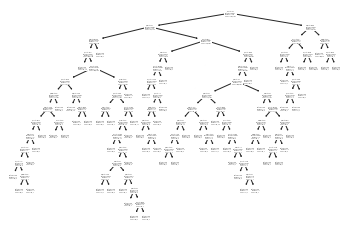

In [31]:
#entropy graph
tree_entropy =  tree.DecisionTreeClassifier(criterion = 'entropy', random_state=0)
tree_entropy = tree_entropy.fit(X_train, y_train)

print('\nEntropy\n', tree.plot_tree(tree_entropy))

# word format representation
text_representation_entropy = tree.export_text(decision_tree_classifier_entropy)
print(text_representation_entropy)



Gini
 [Text(0.6485445205479452, 0.9642857142857143, 'X[4] <= 2.5\ngini = 0.496\nsamples = 343\nvalue = [156, 187]'), Text(0.3929794520547945, 0.8928571428571429, 'X[3] <= 0.5\ngini = 0.422\nsamples = 254\nvalue = [77, 177]'), Text(0.2328767123287671, 0.8214285714285714, 'X[8] <= 5676.0\ngini = 0.317\nsamples = 147\nvalue = [29, 118]'), Text(0.2191780821917808, 0.75, 'X[7] <= 224.5\ngini = 0.296\nsamples = 144\nvalue = [26, 118]'), Text(0.1506849315068493, 0.6785714285714286, 'X[7] <= 104.0\ngini = 0.224\nsamples = 101\nvalue = [13, 88]'), Text(0.1232876712328767, 0.6071428571428571, 'X[15] <= 0.5\ngini = 0.405\nsamples = 39\nvalue = [11, 28]'), Text(0.1095890410958904, 0.5357142857142857, 'X[8] <= 722.0\ngini = 0.458\nsamples = 31\nvalue = [11, 20]'), Text(0.0821917808219178, 0.4642857142857143, 'X[8] <= 0.5\ngini = 0.417\nsamples = 27\nvalue = [8, 19]'), Text(0.0684931506849315, 0.39285714285714285, 'X[1] <= 26.21\ngini = 0.5\nsamples = 16\nvalue = [8, 8]'), Text(0.0547945205479452, 

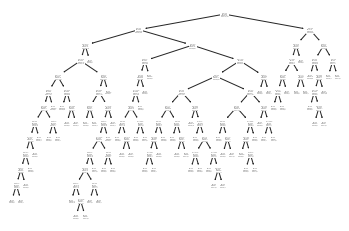

In [32]:
#gini graph
tree_gini =  tree.DecisionTreeClassifier(criterion = 'gini', random_state=0)
tree_gini = tree_gini.fit(X_train, y_train)

print('\nGini\n', tree.plot_tree(tree_gini))

# word format representation
text_representation_gini = tree.export_text(decision_tree_classifier_gini)
print(text_representation_gini)

In [33]:
#Confusion matrix:
print("Confusion Matrix Entropy: \n", confusion_matrix(y_test, predictions_entropy))
print("\nConfusion Matrix Gini: \n", confusion_matrix(y_test, predictions_gini))

Confusion Matrix Entropy: 
 [[27  9]
 [14 36]]

Confusion Matrix Gini: 
 [[29  7]
 [11 39]]


In [34]:
print('Entropy:', linregress(y_test.to_numpy().ravel(), np.array(predictions_entropy)))
print('\nGini:', linregress(y_test.to_numpy().ravel(), np.array(predictions_gini)))

Entropy: LinregressResult(slope=0.47000000000000025, intercept=0.2499999999999999, rvalue=0.46423291042530734, pvalue=6.7236546929196195e-06, stderr=0.09783976209915399, intercept_stderr=0.0746021192090157)

Gini: LinregressResult(slope=0.5855555555555555, intercept=0.19444444444444442, rvalue=0.5791558491326325, pvalue=5.166052736765785e-09, stderr=0.08993032445681332, intercept_stderr=0.0685712295460565)


In [35]:
# returning the decision path in a tree
print('the decision path in a tree')

print('Entropy:')
print(decision_tree_classifier_entropy.decision_path(X_test))

print('\nGini:')
print(decision_tree_classifier_gini.decision_path(X_test))

the decision path in a tree
Entropy:
  (0, 0)	1
  (0, 118)	1
  (0, 132)	1
  (0, 133)	1
  (1, 0)	1
  (1, 1)	1
  (1, 55)	1
  (1, 56)	1
  (1, 57)	1
  (1, 58)	1
  (1, 60)	1
  (1, 68)	1
  (2, 0)	1
  (2, 118)	1
  (2, 119)	1
  (2, 129)	1
  (2, 131)	1
  (3, 0)	1
  (3, 1)	1
  (3, 2)	1
  (3, 3)	1
  (3, 5)	1
  (3, 6)	1
  (3, 24)	1
  (3, 25)	1
  :	:
  (83, 118)	1
  (83, 132)	1
  (83, 133)	1
  (84, 0)	1
  (84, 1)	1
  (84, 2)	1
  (84, 3)	1
  (84, 5)	1
  (84, 29)	1
  (84, 30)	1
  (84, 34)	1
  (84, 35)	1
  (84, 36)	1
  (84, 38)	1
  (84, 39)	1
  (84, 43)	1
  (84, 44)	1
  (85, 0)	1
  (85, 1)	1
  (85, 2)	1
  (85, 3)	1
  (85, 5)	1
  (85, 6)	1
  (85, 24)	1
  (85, 25)	1

Gini:
  (0, 0)	1
  (0, 120)	1
  (0, 132)	1
  (0, 133)	1
  (0, 135)	1
  (0, 141)	1
  (1, 0)	1
  (1, 1)	1
  (1, 53)	1
  (1, 54)	1
  (1, 55)	1
  (1, 56)	1
  (1, 57)	1
  (1, 58)	1
  (1, 60)	1
  (1, 62)	1
  (2, 0)	1
  (2, 120)	1
  (2, 132)	1
  (2, 133)	1
  (2, 134)	1
  (3, 0)	1
  (3, 1)	1
  (3, 2)	1
  (3, 3)	1
  :	:
  (82, 26)	1
  (83, 0)	1
  (8

In [36]:
# returning the depth of the tree

print('Entropy:')
print('Depth of the tree: ',decision_tree_classifier_entropy.get_depth())

print('\nGini:')
print('Depth of the tree: ',decision_tree_classifier_gini.get_depth())

Entropy:
Depth of the tree:  15

Gini:
Depth of the tree:  13


In [37]:
# returning the number of leaves of the tree
print('Entropy:')
print('number of leaves of the tree: ',decision_tree_classifier_entropy.get_n_leaves())

print('\nGini:')
print('number of leaves of the tree: ',decision_tree_classifier_gini.get_n_leaves())

Entropy:
number of leaves of the tree:  69

Gini:
number of leaves of the tree:  73


In [38]:
# returning the parameters for our case
print("Entropy:")
print(decision_tree_classifier_entropy.get_params())

print("\nGini:")
print(decision_tree_classifier_gini.get_params())

Entropy:
{'ccp_alpha': 0.0, 'class_weight': None, 'criterion': 'entropy', 'max_depth': None, 'max_features': None, 'max_leaf_nodes': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'random_state': 0, 'splitter': 'best'}

Gini:
{'ccp_alpha': 0.0, 'class_weight': None, 'criterion': 'gini', 'max_depth': None, 'max_features': None, 'max_leaf_nodes': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'random_state': 0, 'splitter': 'best'}


In [39]:
# Predicting class log-probabilities
print('class log-probabilities: ')

print('Entropy:')
print(decision_tree_classifier_entropy.predict_log_proba(X_test))

print('\nGini:')
print(decision_tree_classifier_gini.predict_log_proba(X_test))

class log-probabilities: 
Entropy:
[[  0. -inf]
 [  0. -inf]
 [  0. -inf]
 [-inf   0.]
 [-inf   0.]
 [-inf   0.]
 [  0. -inf]
 [-inf   0.]
 [-inf   0.]
 [  0. -inf]
 [  0. -inf]
 [  0. -inf]
 [-inf   0.]
 [  0. -inf]
 [-inf   0.]
 [  0. -inf]
 [  0. -inf]
 [  0. -inf]
 [-inf   0.]
 [-inf   0.]
 [  0. -inf]
 [  0. -inf]
 [  0. -inf]
 [  0. -inf]
 [  0. -inf]
 [  0. -inf]
 [-inf   0.]
 [-inf   0.]
 [-inf   0.]
 [-inf   0.]
 [-inf   0.]
 [  0. -inf]
 [-inf   0.]
 [-inf   0.]
 [-inf   0.]
 [  0. -inf]
 [-inf   0.]
 [-inf   0.]
 [-inf   0.]
 [  0. -inf]
 [-inf   0.]
 [  0. -inf]
 [  0. -inf]
 [-inf   0.]
 [  0. -inf]
 [-inf   0.]
 [-inf   0.]
 [-inf   0.]
 [  0. -inf]
 [  0. -inf]
 [  0. -inf]
 [-inf   0.]
 [  0. -inf]
 [-inf   0.]
 [-inf   0.]
 [-inf   0.]
 [-inf   0.]
 [-inf   0.]
 [  0. -inf]
 [  0. -inf]
 [  0. -inf]
 [-inf   0.]
 [-inf   0.]
 [-inf   0.]
 [  0. -inf]
 [-inf   0.]
 [-inf   0.]
 [-inf   0.]
 [  0. -inf]
 [-inf   0.]
 [  0. -inf]
 [  0. -inf]
 [  0. -inf]
 [  0. -inf]
 [-

C:\Users\devsh\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\tree\_classes.py:1014: RuntimeWarning: divide by zero encountered in log
  return np.log(proba)
C:\Users\devsh\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\tree\_classes.py:1014: RuntimeWarning: divide by zero encountered in log
  return np.log(proba)


In [40]:
# Predicting class probabilities
print('class probabilities: ')
decision_tree_classifier_entropy.predict_proba(X_test)

class probabilities: 


array([[1., 0.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [1., 0.

In [41]:
# Computing the pruning path during Minimal Cost-Complexity Pruning
print('Entropy: Computing the pruning path during Minimal Cost-Complexity Pruning:')
print(decision_tree_classifier_entropy.cost_complexity_pruning_path(X_test,y_test))

# Computing the pruning path during Minimal Cost-Complexity Pruning
print('\nGini: Computing the pruning path during Minimal Cost-Complexity Pruning:')
print(decision_tree_classifier_gini.cost_complexity_pruning_path(X_test,y_test))

Entropy: Computing the pruning path during Minimal Cost-Complexity Pruning:
{'ccp_alphas': array([0.        , 0.02325581, 0.03203358, 0.03584184, 0.03765053,
       0.03773387, 0.06474182, 0.10551238, 0.11247915, 0.1795256 ,
       0.24088088]), 'impurities': array([0.        , 0.02325581, 0.05528939, 0.12697308, 0.23992467,
       0.27765854, 0.34240036, 0.44791274, 0.56039188, 0.73991748,
       0.98079836])}

Gini: Computing the pruning path during Minimal Cost-Complexity Pruning:
{'ccp_alphas': array([0.        , 0.01094391, 0.0166113 , 0.01665288, 0.01744186,
       0.03139535, 0.03322259, 0.04875919, 0.07834302, 0.15586566]), 'impurities': array([0.        , 0.02188782, 0.05511042, 0.12172192, 0.13916378,
       0.17055913, 0.20378172, 0.25254091, 0.33088394, 0.48674959])}


In [42]:
# applying Random Forest Classifier
random_forest_classifier = RandomForestClassifier(max_depth=2, random_state=0)
random_forest_classifier = random_forest_classifier.fit(X_train,y_train)

print("Random Forest Classifier: ", random_forest_classifier.score(X, y))

C:\Users\devsh\AppData\Local\Programs\Python\Python37\lib\site-packages\ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until


Random Forest Classifier:  0.7925407925407926


In [43]:
predictions_random_forest = random_forest_classifier.predict(X_test)

In [44]:
# calculating the statistical metrics for random forest classifier
print("Random Forest:")
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, predictions_random_forest))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, predictions_random_forest))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, predictions_random_forest)))


Random Forest:
Mean Absolute Error: 0.16279069767441862
Mean Squared Error: 0.16279069767441862
Root Mean Squared Error: 0.4034732923929645


In [45]:
#Confusion matrix:
print("Confusion Matrix Random Forest: \n", confusion_matrix(y_test, predictions_random_forest))


Confusion Matrix Random Forest: 
 [[24 12]
 [ 2 48]]


In [46]:
print('Entropy:', linregress(y_test.to_numpy().ravel(), np.array(predictions_random_forest)))

Entropy: LinregressResult(slope=0.6266666666666667, intercept=0.3333333333333333, rvalue=0.6731479815970672, pvalue=1.2464939766709512e-12, stderr=0.07511543145271837, intercept_stderr=0.057274979532281584)


In [47]:
# returning the decision path in a forest
print('the decision path in a tree')

print('Random Forest Classifier:')
print(random_forest_classifier.decision_path(X_test))

the decision path in a tree
Random Forest Classifier:
(<86x694 sparse matrix of type '<class 'numpy.int64'>'
	with 25777 stored elements in Compressed Sparse Row format>, array([  0,   7,  14,  21,  28,  35,  42,  49,  56,  63,  70,  77,  84,
        89,  96, 103, 110, 117, 124, 131, 136, 143, 150, 157, 164, 171,
       178, 185, 192, 199, 206, 213, 220, 227, 234, 241, 248, 255, 262,
       269, 276, 283, 290, 297, 304, 311, 318, 325, 332, 339, 346, 353,
       360, 367, 374, 381, 388, 395, 402, 407, 414, 421, 428, 435, 442,
       449, 456, 463, 470, 477, 484, 491, 498, 505, 512, 519, 526, 533,
       540, 547, 554, 561, 568, 575, 582, 589, 596, 603, 610, 617, 624,
       631, 638, 645, 652, 659, 666, 673, 680, 687, 694], dtype=int32))


In [48]:
# returning the parameters for our case
print("Random_forest_classifier:")
print(random_forest_classifier.get_params())

Random_forest_classifier:
{'bootstrap': True, 'ccp_alpha': 0.0, 'class_weight': None, 'criterion': 'gini', 'max_depth': 2, 'max_features': 'auto', 'max_leaf_nodes': None, 'max_samples': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'n_estimators': 100, 'n_jobs': None, 'oob_score': False, 'random_state': 0, 'verbose': 0, 'warm_start': False}


In [49]:
print('Random Forest Log Prob:')
print(random_forest_classifier.predict_log_proba(X_test))

Random Forest Log Prob:
[[-0.29742015 -1.35763649]
 [-0.48562725 -0.95532038]
 [-0.50057795 -0.93186188]
 [-1.05072386 -0.4302977 ]
 [-0.83054928 -0.57236392]
 [-0.97174893 -0.47549167]
 [-0.99081433 -0.46406009]
 [-1.56173388 -0.23543381]
 [-1.03639408 -0.43808879]
 [-0.53183975 -0.88557503]
 [-0.27408022 -1.4282465 ]
 [-1.09407891 -0.40773953]
 [-1.09629933 -0.4066236 ]
 [-0.50198122 -0.92970575]
 [-0.92611306 -0.5043306 ]
 [-0.42313585 -1.06418086]
 [-0.48400474 -0.95792107]
 [-0.59874466 -0.79739946]
 [-0.77723248 -0.61558709]
 [-1.10316178 -0.4031981 ]
 [-1.01195928 -0.4517804 ]
 [-0.50224637 -0.92929922]
 [-0.63218562 -0.7580677 ]
 [-0.88981026 -0.52887704]
 [-0.3279789  -1.27431736]
 [-0.43786211 -1.03680655]
 [-1.04941017 -0.43100481]
 [-0.69512064 -0.6911776 ]
 [-0.56336268 -0.84232375]
 [-0.93816953 -0.49650125]
 [-0.77847062 -0.61453496]
 [-0.86036434 -0.54992677]
 [-0.96883465 -0.47727006]
 [-0.87885765 -0.53658286]
 [-1.09238893 -0.40859137]
 [-1.11528967 -0.39722957]
 [-1

In [50]:
# Predicting class probabilities
print('class probabilities RFC: ')
random_forest_classifier.predict_proba(X_test)

class probabilities RFC: 


array([[0.74273189, 0.25726811],
       [0.61531112, 0.38468888],
       [0.60618022, 0.39381978],
       [0.34968453, 0.65031547],
       [0.43580984, 0.56419016],
       [0.37842063, 0.62157937],
       [0.37127423, 0.62872577],
       [0.20977204, 0.79022796],
       [0.35473151, 0.64526849],
       [0.58752308, 0.41247692],
       [0.76027108, 0.23972892],
       [0.33484789, 0.66515211],
       [0.33410521, 0.66589479],
       [0.60533018, 0.39466982],
       [0.3960903 , 0.6039097 ],
       [0.65498965, 0.34501035],
       [0.61631028, 0.38368972],
       [0.54950102, 0.45049898],
       [0.45967642, 0.54032358],
       [0.33182028, 0.66817972],
       [0.36350607, 0.63649393],
       [0.6051697 , 0.3948303 ],
       [0.53142903, 0.46857097],
       [0.41073368, 0.58926632],
       [0.72037822, 0.27962178],
       [0.64541477, 0.35458523],
       [0.35014422, 0.64985578],
       [0.49901424, 0.50098576],
       [0.5692915 , 0.4307085 ],
       [0.39134352, 0.60865648],
       [0.